# Trabajo semanal N°1
## Ejercicio 7, TP1

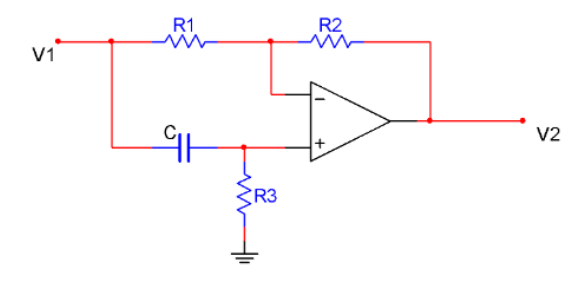

### 1) Obtener la función transferencia $\frac{V_2}{V_1}$ ( módulo , fase y diagrama de polos y ceros).

Analizando el circuito se obtienen las siguientes ecuaciones: $$V_A(\frac{1}{R_1}+\frac{1}{R_2}) - \frac{V_1}{R_1} - \frac{V_2}{R_2} = 0 $$ 
$$V_A(\frac{1}{R_3} + sC) - V_1sC = 0 $$ 

Realizando el álgebra correspondiente obtenemos que $$V_A = \frac{s}{s + \frac{1}{R_3C}} V_1$$

Y reemplazando en la primer ecuación $$ \frac{V_1}{V_2} = \frac{s - \frac{R_2}{R_1R_3C}}{s + \frac{1}{R_3C}} $$

A continuación se simulará con el módulo SymPy para corroborar que el álgebra haya sido aplicada correctamente:

In [2]:
import sympy as sp
from sympy.abc import s
from IPython.display import display, Math

V1, V2, Va = sp.symbols("V1, V2, Va")
R1, R2, C, R3 = sp.symbols("R1, R2, C, R3")

aa = sp.solve([ 
                Va*(C+1/R3)-V1*C, 
                Va*(1/R1+1/R2) -V1/R1 -V2/R2
                ], 
                [V1, V2])

print("Se partió de las ecuaciones... ")
display(aa)

transf_func = aa[V2]/aa[V1]

tf = transf_func.subs(C, s*C)

num, den = sp.fraction(sp.simplify(sp.expand(tf)))

num = sp.Poly(num,s)
den = sp.Poly(den,s)

k = num.LC() / den.LC()

num = num.monic()
den = den.monic()

den_coeffs = den.all_coeffs()
wo = den_coeffs[-1]

tf_final = sp.Mul(k,num/den, evaluate=False)

print("Y se obtuvo la siguiente función transferencia: ")
display(tf_final)

Se partió de las ecuaciones... 


{V1: (C*R3*Va + Va)/(C*R3), V2: (C*R1*R3*Va - R2*Va)/(C*R1*R3)}

Y se obtuvo la siguiente función transferencia


1*((s - R2/(C*R1*R3))/(s + 1/(C*R3)))

### 2) Obtenga la función transferencia, pero normalizada. ¿Cuál sería en este caso la norma de frecuencia y qué interpretación circuital podría tener?

Partiendo de la función transferencia hallada en el punto 1 se asume $ R_2 = R_1 \wedge ω_o = \frac{1}{R_3C} $ porque debe corresponderse con la transferencia de un filtro pasa todo y al reemplazar: $$ \frac{V_2}{V_1} = \frac{s - ω_o}{s + ω_o} $$

Ahora es necesario hacer un cambio de variable para normalizar la frecuencia: $$ s = ω_o$ $$
Y operando queda: $$ \frac{V_2}{V_1} = \frac{$-1}{$+1} $$

### 3) Simule la función transferencia normalizada (Python, Matlab, etc).

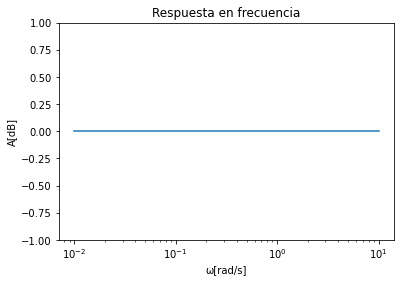

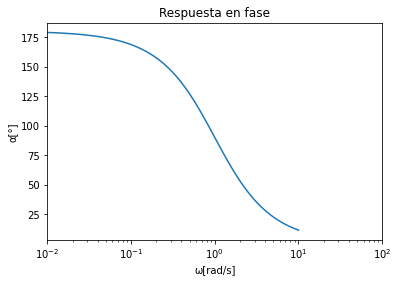

In [15]:
from scipy import signal
import matplotlib.pyplot as plt

num = [1, -1]
den = [1, 1]
sys = signal.TransferFunction(num, den)
w, mag, phase = signal.bode(sys)
plt.figure()
plt.xlabel('ω[rad/s]')
plt.ylabel('A[dB]')
plt.title('Respuesta en frecuencia')
plt.semilogx(w, mag)    # Bode magnitude plot
plt.ylim(-1,1)
plt.figure()
plt.xlabel('ω[rad/s]')
plt.ylabel('α[°]')
plt.title('Respuesta en fase')
plt.semilogx(w, phase)  # Bode phase plot
plt.xlim(0.01 , 100)
plt.show()

Para la obtención de una red normalizada hay que hacer un ajuste en el capacitor: $ C = C'ω_o $ (Si $C'=1µ \wedge ω_o = 1k)$ $$ C = 1000µ $$

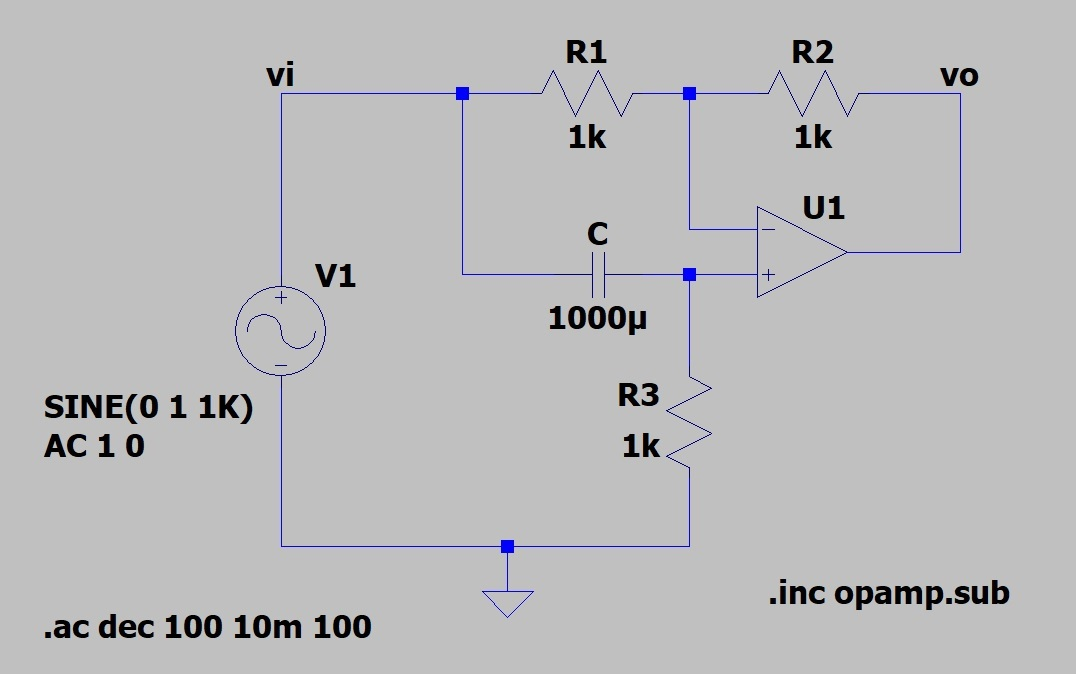

### 4) Simule el circuito y obtenga la respuesta en frecuencia pedida en 1), para los valores:  $ \frac{R_2}{R_1} = 1; R3=1kΩ y C=1µF$

Reemplazando en la función transferencia los valores solicitados:
$$ \frac{V_2}{V_1} = \frac{s - 10^3}{s + 10^3} $$
Y emulando el circuito en LTSpice:

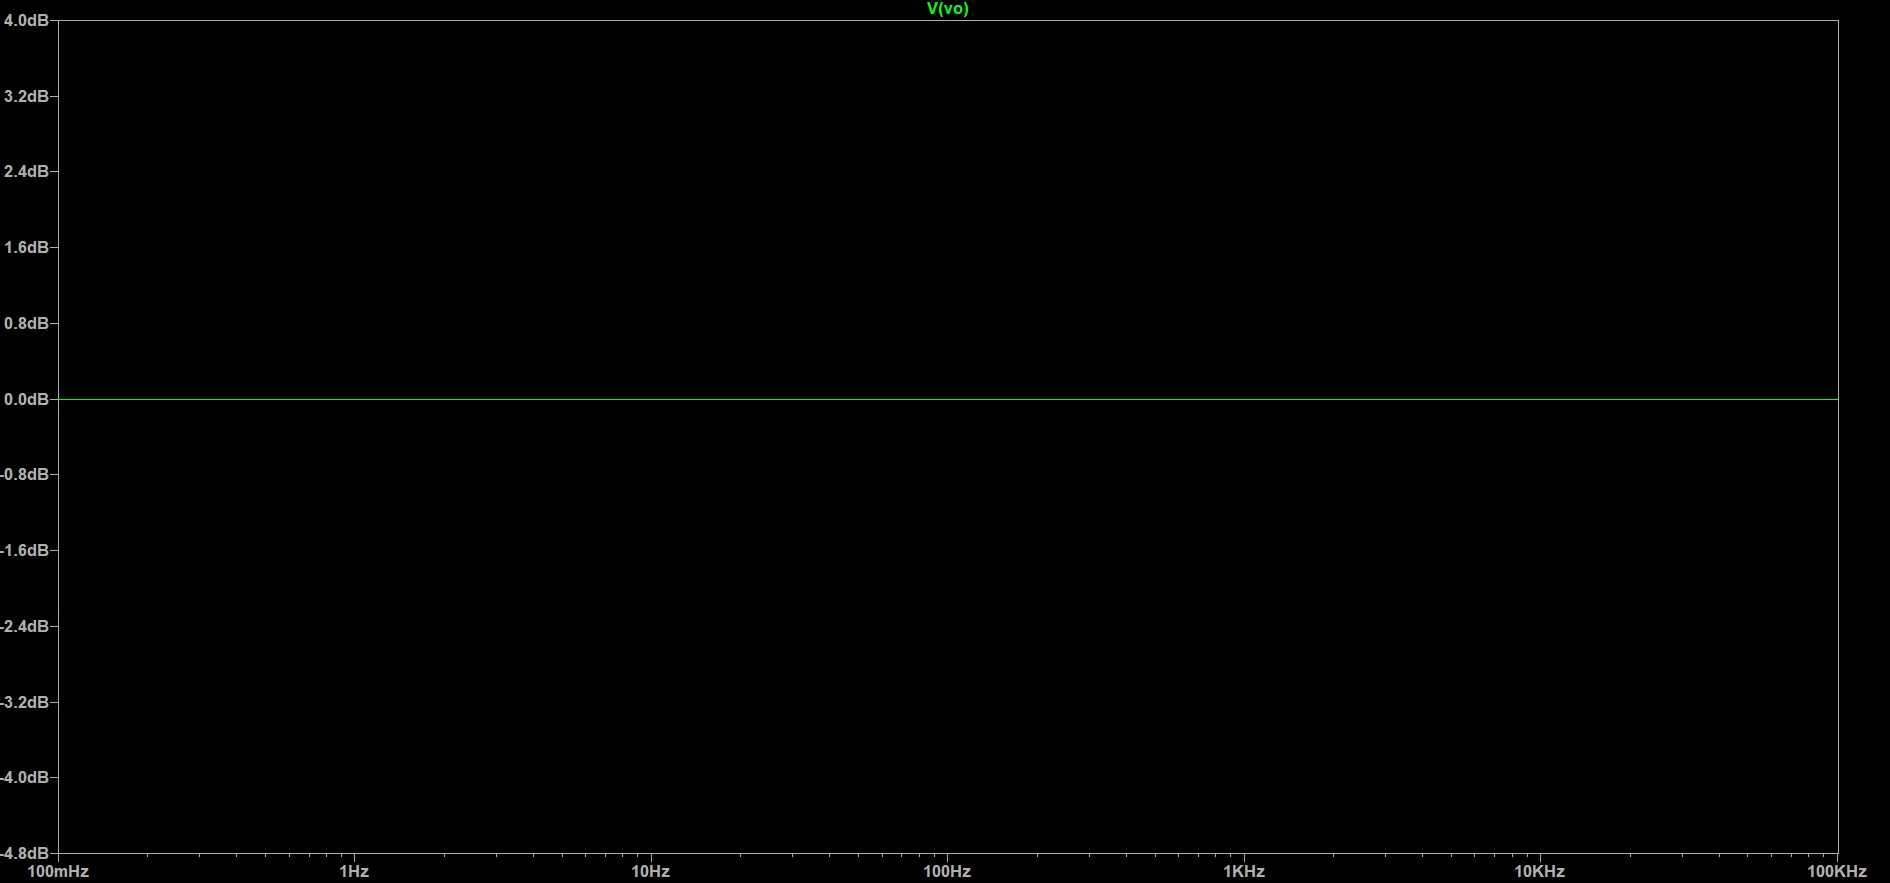



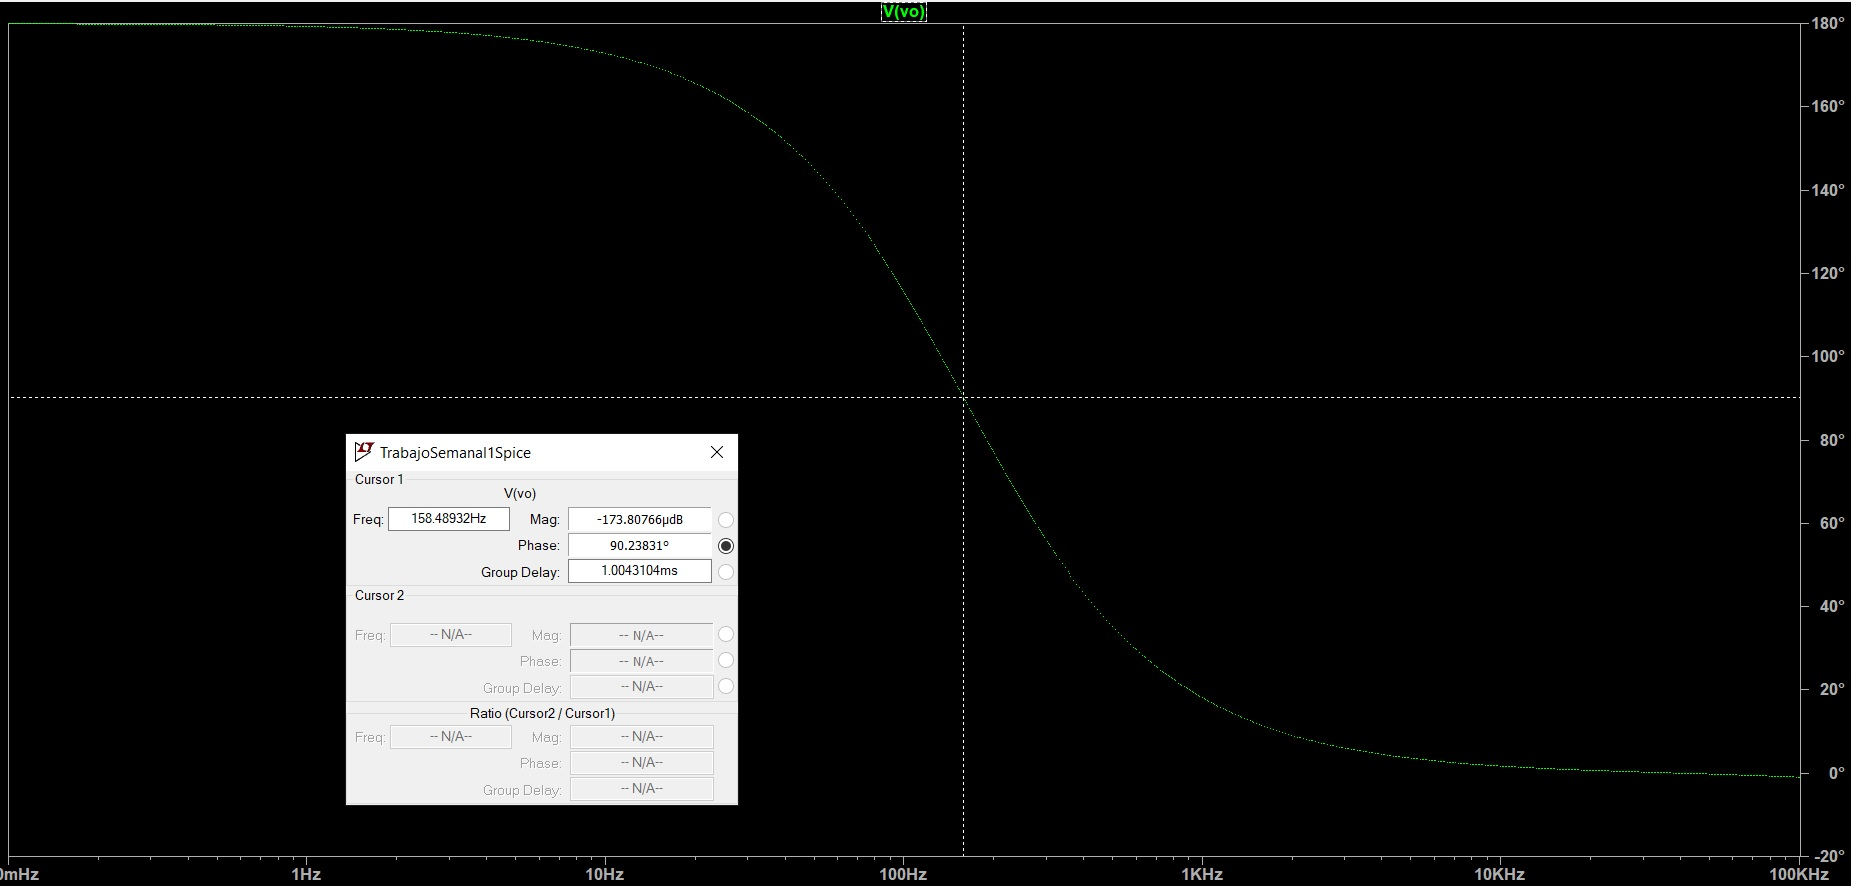

Tener en cuenta que $f_o = \frac{ω_o}{2\pi} \cong 159Hz$

### 5) ¿Qué utilidad podría tener este tipo de circuitos pasa-todo?

Se podría emular un inversor lógico a partir de cierta $ω_o$ ya que la señal no se verá atenuada ni amplificada pero su fase se invertirá, esto puede ser útil para crear una señal diferencial a otra y hacerla más inmune al ruido